# Data Augmentation To Address Overfitting In Flower Classification CNN
### In this notebook we will build a CNN to classify flower images. We will also see how our model overfits and how overfitting can be addressed using data augmentation. Data augmentation is a process of generating new training samples from current training dataset using transformations such as zoom, rotations, change in contrast etc.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import os
import PIL
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models

## Downloading the flowers dataset from googleapis.com

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228818944/228813984 [==============================] - 5s 0us/step


In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
len(list(data_dir.glob('*/*.jpg')))

3670

In [6]:
roses=list(data_dir.glob('roses/*.jpg'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/16476788181_0e2ffc719a.jpg'),
 PosixPath('datasets/flower_photos/roses/18220342690_f1c20134bd.jpg'),
 PosixPath('datasets/flower_photos/roses/8667746487_781af9e615_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4267024012_295e7141a3_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3315973481_850d2253e9_n.jpg')]

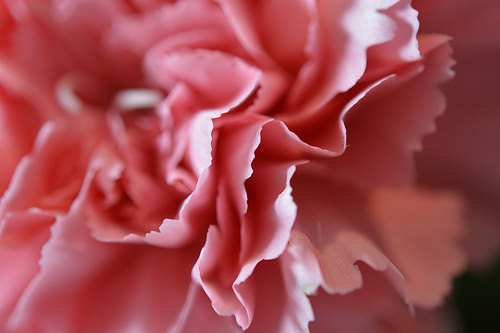

In [7]:
PIL.Image.open(str(roses[0]))

In [8]:
cv2.imread(str(roses[0]))

array([[[ 60,  58, 208],
        [ 61,  58, 204],
        [ 66,  60, 203],
        ...,
        [ 65,  57, 127],
        [ 65,  57, 127],
        [ 65,  57, 127]],

       [[ 58,  57, 207],
        [ 58,  57, 203],
        [ 63,  59, 202],
        ...,
        [ 64,  56, 126],
        [ 64,  56, 126],
        [ 64,  56, 126]],

       [[ 57,  56, 206],
        [ 56,  56, 204],
        [ 59,  56, 201],
        ...,
        [ 63,  55, 125],
        [ 63,  55, 125],
        [ 63,  55, 125]],

       ...,

       [[101,  87, 181],
        [103,  86, 183],
        [102,  85, 182],
        ...,
        [  5,  10,  11],
        [  5,  10,  11],
        [  6,  11,  12]],

       [[100,  86, 182],
        [100,  86, 182],
        [ 99,  84, 182],
        ...,
        [  5,  10,  11],
        [  5,  10,  11],
        [  5,  10,  11]],

       [[ 98,  87, 180],
        [ 99,  85, 181],
        [ 99,  84, 182],
        ...,
        [  6,  10,  11],
        [  6,  10,  11],
        [  6,  10,  11]]

### Creating a Dictionary of each category of flower

In [9]:
flower_images={
    'roses' : list(data_dir.glob('roses/*.jpg')),
    'tulips': list(data_dir.glob('tulips/*.jpg')),
    'dandelin':list(data_dir.glob('dandelin/*.jpg')),
    'sunflowers':list(data_dir.glob('sunflowers/*.jpg')),
    'daisy':list(data_dir.glob('daisy/*.jpg'))
}

In [10]:
flower_labels={
    'roses':0,
    'tulips':1,
    'dandelin':2,
    'sunflowers':3,
    'daisy':4
}

In [11]:
flower_images['roses'][:5]

[PosixPath('datasets/flower_photos/roses/16476788181_0e2ffc719a.jpg'),
 PosixPath('datasets/flower_photos/roses/18220342690_f1c20134bd.jpg'),
 PosixPath('datasets/flower_photos/roses/8667746487_781af9e615_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4267024012_295e7141a3_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3315973481_850d2253e9_n.jpg')]

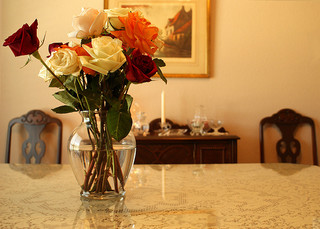

In [12]:
PIL.Image.open(str(flower_images['roses'][3]))

In [13]:
cv2.imread(str(flower_images['roses'][1])).shape

(333, 500, 3)

### Resizing every image to 180x180 and creating X(having images) and Y(having labels of flower category) for model

In [14]:
x,y=[],[]
for flower_name,images in flower_images.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img=cv2.resize(img,(180,180))
        x.append(resized_img)
        y.append(flower_labels[flower_name])

In [15]:
x=np.array(x)
y=np.array(y)

## Preprocessing of data

In [16]:
x=x/255        # scaling of each image pixel

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

## Data Augmentation

In [18]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(180, 180,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
])

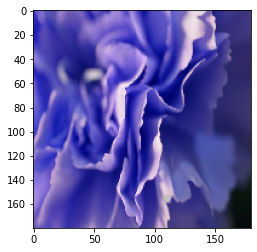

In [19]:
plt.imshow(x[0])                     # original image

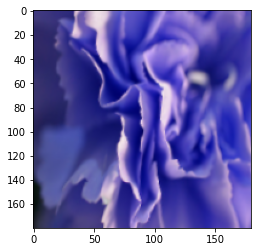

In [20]:
plt.imshow(data_augmentation(x)[0])           # augmented image

## Training of model using Dropout layers and Augmentaion 

In [21]:
model = keras.Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(5)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(x_train, y_train, epochs=30)

Epoch 1/30
65/65 [==============================] - 6s 21ms/step - loss: 1.2990 - accuracy: 0.4115
Epoch 2/30
65/65 [==============================] - 1s 18ms/step - loss: 0.8963 - accuracy: 0.6245
Epoch 3/30
65/65 [==============================] - 1s 18ms/step - loss: 0.8752 - accuracy: 0.6324
Epoch 4/30
65/65 [==============================] - 1s 18ms/step - loss: 0.7781 - accuracy: 0.6709
Epoch 5/30
65/65 [==============================] - 1s 18ms/step - loss: 0.7288 - accuracy: 0.6931
Epoch 6/30
65/65 [==============================] - 1s 18ms/step - loss: 0.7212 - accuracy: 0.7042
Epoch 7/30
65/65 [==============================] - 1s 21ms/step - loss: 0.6728 - accuracy: 0.7233
Epoch 8/30
65/65 [==============================] - 1s 18ms/step - loss: 0.6339 - accuracy: 0.7241
Epoch 9/30
65/65 [==============================] - 1s 19ms/step - loss: 0.5719 - accuracy: 0.7627
Epoch 10/30
65/65 [==============================] - 1s 20ms/step - loss: 0.5412 - accuracy: 0.7758
Epoch 11/

In [22]:
model.evaluate(x_test,y_test)

22/22 [==============================] - 0s 9ms/step - loss: 0.6359 - accuracy: 0.7720


[0.6358938217163086, 0.7720057964324951]